<a href="https://colab.research.google.com/github/durgesh510/mtaie19/blob/master/MT19AIE235_ML_PA5_Q2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
For Loss Function : CrossEntropyLoss
*****************************
Epoch 0 - Training loss: 0.962945239432156
Epoch 1 - Training loss: 0.13072049688082188
Epoch 2 - Training loss: 0.050905083196703345
Epoch 3 - Training loss: 0.01553155050438363
Epoch 4 - Training loss: 0.0065989375583012586
Epoch 5 - Training loss: 0.003062184632435674
Epoch 6 - Training loss: 0.003262375245030853
Epoch 7 - Training loss: 0.001606211549769796
Epoch 8 - Training loss: 0.0012129621287749616
Epoch 9 - Training loss: 0.0010559867554002266
Epoch 10 - Training loss: 0.0009105051767983241
Epoch 11 - Training loss: 0.0008092734142883273
Epoch 12 - Training loss: 0.0007317485347994079
Epoch 13 - Training loss: 0.000659662939615373
Epoch 14 - Training loss: 0.0006200237570874378

Training Time (in minutes) = 3.3099082986513775
**************************
Model Accuracy = 0.955056179775

'# Final Configuration and Conclusion\n\nThis is the best configuration which was fetching ~ 95 to 96 % of accuracy\n\n## **Final Configuration:**\n\n> `input_size` = 784\n\n> `hidden_sizes` = [128, 32]\n\n> `output_size` = 10\n\n> `learning rate`  = 0.009\n\n> `batch size` = 10\n\n> `epochs` = 15\n\n> `loss function` = "CrossEntropyLoss"\n\n## **Conclusion**:\n\nIt is observed that the training was fast w.r.t to MNIST as the data set was small(1000 images) and \nthe model was working well with small batch size, since there were not many data points, so small batch \nsize helped to update the `weights` faster and it moves towards convergence quickly\n'

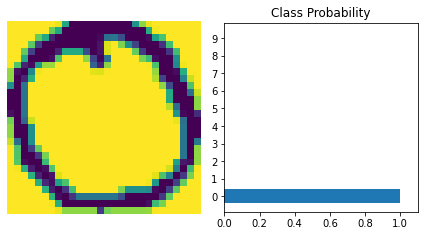

In [4]:
#MT19AIE235
# **Question 2.3.**
# IMP - Setting the Data Set `path variable`
"""
Please update this path for **`training`** and **`validation`** dataset
"""

from google.colab import drive
drive.mount('/content/drive')

p_train = "/content/drive/My Drive/ML_Assign/PA5/GurNum/train"                # Update this variable with the exact path for training dataset
p_val = "/content/drive/My Drive/ML_Assign/PA5/GurNum/val"                    # Update this variable with the exact path for the val dataset

# Importing the modules



import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

"""# Neural Network

Making reusable function:

`get_nn_model()` - This function takes no. of hidden layers as input and returns the `pytorch nn` object with respective no. of hidden layers

`get_criterion()` - This takes sets the respective loss function for the neural network 

`fit()` - This performs the training 

`model_accuracy()` - This computs the acccuracy of the model
"""

def get_nn_model(hidden_sizes):
    if len(hidden_sizes) == 2:
        model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                            nn.ReLU(),
                            nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                            nn.ReLU(),
                            nn.Linear(hidden_sizes[1], output_size),
                            nn.LogSoftmax(dim=1))
    elif len(hidden_sizes) == 3:
        model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                    nn.ReLU(),
                    nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                    nn.ReLU(),
                    nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                    nn.ReLU(),                              
                    nn.Linear(hidden_sizes[2], output_size),
                    nn.LogSoftmax(dim=1))
    elif len(hidden_sizes) == 4:
        model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                    nn.ReLU(),
                    nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                    nn.ReLU(),
                    nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                    nn.ReLU(),     
                    nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                    nn.ReLU(),  
                    nn.Linear(hidden_sizes[3], output_size),
                    nn.LogSoftmax(dim=1))
        
    return model

def get_criterion(l):

    if l == "NLLLoss":
        criterion = nn.NLLLoss()
    elif l == "MSELoss":
        criterion = nn.MSELoss()
    elif l == "SmoothL1Loss":
        criterion = nn.SmoothL1Loss()
    elif l == "CrossEntropyLoss":
        criterion = nn.CrossEntropyLoss()
    elif l == "KLDivLoss":
        criterion = nn.KLDivLoss()
    
    return criterion

def fit(model, lr, criterion):

    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    time0 = time()
    epochs = 15      
    loss_history = dict()

    for e in range(epochs):
        running_loss = 0
        for images, labels in trainloader:
            # Flatten MNIST images into a 784 long vector
            images = images[:, 2, :, :]
            images = images.unsqueeze(1)
            images = images.view(images.shape[0], -1)
        
            # Training pass
            optimizer.zero_grad()
            
            output = model(images)
            loss = criterion(output, labels)
            
            #This is where the model learns by backpropagating
            loss.backward()
            
            #And optimizes its weights here
            optimizer.step()
            
            running_loss += loss.item()
        else:
            loss_history[e] = running_loss/len(trainloader)
            print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))

    total_time_for_training = (time()-time0)/60

    print("\nTraining Time (in minutes) =",total_time_for_training)

    return model, total_time_for_training, loss_history

def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

def validation_one_sample(valloader, model):

    images, labels = next(iter(valloader))

    img = images[0].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    print("Predicted Digit =", probab.index(max(probab)))
    view_classify(img.view(1, 28, 28), ps)

def model_accuracy(valloader, model):

    correct_count, all_count = 0, 0
    
    for images,labels in valloader:
        images = images[:, 2, :, :]
        images = images.unsqueeze(1)
        for i in range(len(labels)):
            img = images[i].view(1, 784)
            with torch.no_grad():
                logps = model(img)
                
            ps = torch.exp(logps)
            probab = list(ps.numpy()[0])
            pred_label = probab.index(max(probab))
            true_label = labels.numpy()[i]
            if(true_label == pred_label):
                correct_count += 1
            all_count += 1

    acc = correct_count/all_count

#     print("Number Of Images Tested =", all_count)
#     print(f"Model Accuracy = {acc}")

    return acc

"""# Loading the dataset

loading the `Gurmukhi` dataset from the local google drive
"""

preprocess = transforms.Compose([
                                transforms.Resize(28),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))
                                ])

trainset = datasets.ImageFolder(root=p_train, transform = preprocess)
valset = datasets.ImageFolder(root=p_val, transform = preprocess)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=10, shuffle=True)

"""# Model Training

starting the training here. 
While working on this problem, many diff hyperparameters were tried but this configuration gave best model accuracy 



> `input_size` = 784

> `hidden_sizes` = [128, 32]

> `output_size` = 10

> `learning rate`  = 0.009

> `batch size` = 10

> `epochs` = 15

> `loss function` = "CrossEntropyLoss"
"""

loss_funcs = ["CrossEntropyLoss"]

input_size = 784
hidden_sizes = [128, 32]
output_size = 10
lr = 0.009

prams  = {"total_time_for_training": None,
          "loss_history": None,
          "accuracy": None}

final_result_loss = {i: prams.copy() for i in loss_funcs}

for c in loss_funcs:
    
    print(f"For Loss Function : {c}")
    print("*****************************")
    model = get_nn_model(hidden_sizes)
    criterion = get_criterion(c)
    model, total_time_for_training, loss_history = fit(model, lr, criterion)
    accuracy = model_accuracy(valloader, model)
    print("**************************")
    print(f"Model Accuracy = {accuracy}")


    final_result_loss[c]["total_time_for_training"] = total_time_for_training
    final_result_loss[c]["loss_history"] = loss_history
    final_result_loss[c]["accuracy"] = accuracy
    print("********************************")

"""# (Optional) Testing with single sample from Validatation dataset


"""

images, labels = next(iter(valloader))
images = images[:, 2, :, :]
images = images.unsqueeze(1)

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])

print("******************************\n")
print(f"Actual Lable(Digit)                    : {labels[0].item()}")
print(f"Predicted Label(Digit) from the model  : {probab.index(max(probab))}\n")
print("******************************")

view_classify(img.view(1, 28, 28), ps)

"""# Final Configuration and Conclusion

This is the best configuration which was fetching ~ 95 to 96 % of accuracy

## **Final Configuration:**

> `input_size` = 784

> `hidden_sizes` = [128, 32]

> `output_size` = 10

> `learning rate`  = 0.009

> `batch size` = 10

> `epochs` = 15

> `loss function` = "CrossEntropyLoss"

## **Conclusion**:

It is observed that the training was fast w.r.t to MNIST as the data set was small(1000 images) and 
the model was working well with small batch size, since there were not many data points, so small batch 
size helped to update the `weights` faster and it moves towards convergence quickly
"""

